In [1]:
import numpy as np

In [41]:
def calculate_clock_angle(Bz, By):
    angle = np.rad2deg(np.arctan2(By, Bz))  # Calculate angle
    return np.round(angle,1)

def calculate_clock_length(Bz, By):
    return np.sqrt(Bz**2 + By**2)

# Example usage:
Bz = np.array([1, 0, -1])
By = np.array([10, 1, 0])

calculate_clock_angle(Bz, By)
calculate_clock_length(Bz, By)

array([10.04987562,  1.        ,  1.        ])

In [92]:
def E_calulator(v, B):
    return np.cross(v, B)

v = np.array([-400, 0, 0]) #400 km/s
B = np.array([0, 0, 2.5e-5]) #2.5e-5 T = 25,000 nT

#x, y, z in GSE
#x is earth-sun line, y points to dusk, z is north/south

E_calulator(v, B)
print('E in mV', E_calulator(v, B))

E in mV [ 0.    0.01 -0.  ]


In [94]:
def B_calculator(v, E):
    return np.cross(v, E)

B_result = B_calculator(v, E_calulator(v, B))
print('B in T:', B_result)


B in T: [-0.  0. -4.]


In [1]:
import numpy as np

# Define grid size
n_lon = 361  # 0 to 360
n_lat = 181  # -90 to 90

# Create longitude and latitude grids
lon = np.linspace(0, 360, n_lon)
lat = np.linspace(-90, 90, n_lat)

# Create meshgrid for lon and lat
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Define electric potential function
def electric_potential(lat, lon):
    # Example potential function (just for demonstration)
    # Stronger at poles, weaker at equator
    potential = np.sin(np.radians(lat)) * np.sin(np.radians(lat))
    return potential

# Compute electric potential on the grid
potential_grid = electric_potential(lat_grid, lon_grid)

# Compute the gradient of the potential
dlat, dlon = np.gradient(potential_grid, np.abs(lat[1] - lat[0]), np.abs(lon[1] - lon[0]))

# Assemble the electric field components (E = -grad(Phi))
E_lat = -dlat
E_lon = -dlon

# Now you have the electric field components E_lat and E_lon.
# These components represent the electric field in the north-south and east-west directions, respectively.



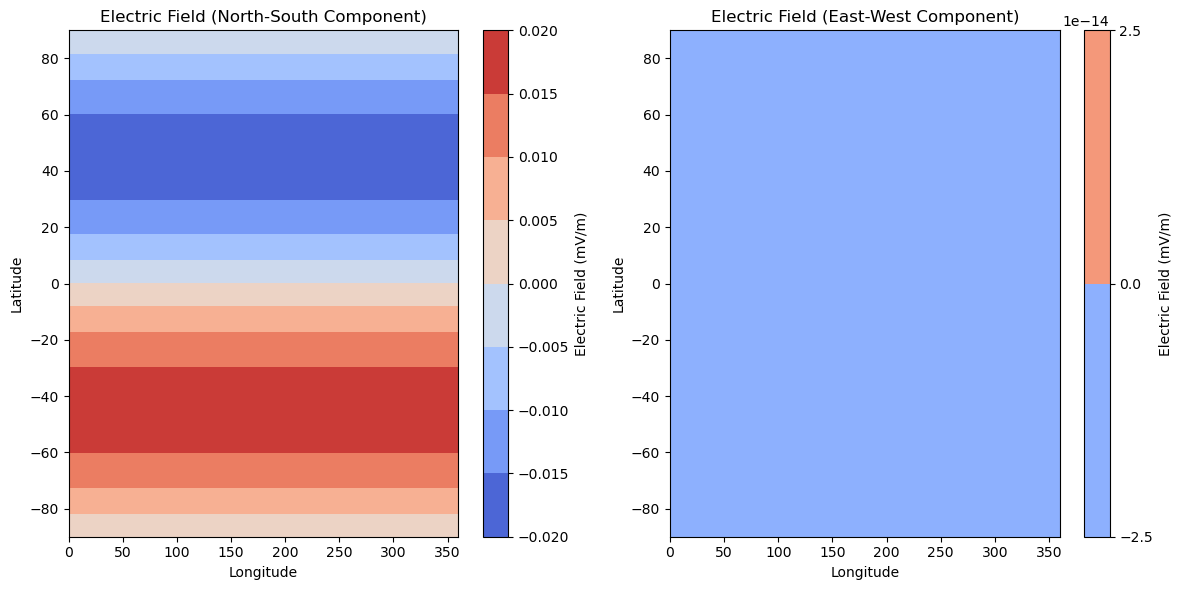

In [8]:
#plot E_lat and E_lon
import matplotlib.pyplot as plt

# Plot the electric field components
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.contourf(lon_grid, lat_grid, E_lat, cmap='coolwarm')
plt.colorbar(label='Electric Field (mV/m)')

plt.title('Electric Field (North-South Component)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(1, 2, 2)
plt.contourf(lon_grid, lat_grid, E_lon, cmap='coolwarm')
plt.colorbar(label='Electric Field (mV/m)')

plt.title('Electric Field (East-West Component)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

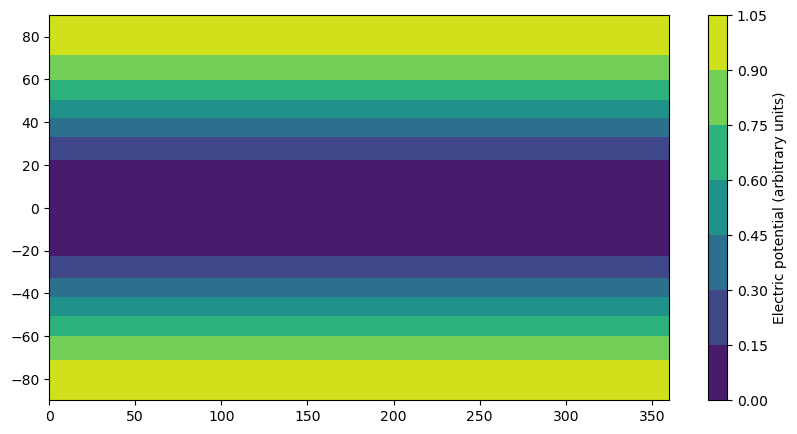

In [5]:
#plot electric_potential
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.contourf(lon_grid, lat_grid, potential_grid, cmap='viridis')
plt.colorbar(label='Electric potential [V]')

In [21]:
x = 10
y = 5
xy_tensor = np.array([[x, y], [-x,y]])
xy_tensor

#calculate diagonal
np.diagonal(xy_tensor)

array([10,  5])